In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2 body Kepler / Glaxy Centers

In [34]:
#Masses in solar masses
m1 = 10e11
m2 = 10e11

#rmin in kpc
rmin = 25

#G in terms of solar masses and kpc 
G = 4.300917270038e-06
e = 0.5

#Functions to get initial values in r,phi
def r(phi):
    return rmin * (1 + e) / (1 - e * np.cos(phi))


def vr(phi):
    return -e * np.sqrt(G * (m1 + m2) / (rmin * (1 + e))) * np.sin(phi)


def vphi(phi):
    return np.sqrt(G * (m1 + m2) / (rmin * (1 + e))) * (1 - e * np.cos(phi))

#Converting to x and y 
def vx(phi):
    return vr(phi) * np.cos(phi) - vphi(phi) * np.sin(phi)


def vy(phi):
    return vr(phi) * np.sin(phi) + vphi(phi) * np.cos(phi)


def x(phi):
    return r(phi) * np.cos(phi)


def y(phi):
    return r(phi) * np.sin(phi)

#Obtain specific x and y for each mass
def x1(phi):
    return m2 / (m1 + m2) * x(phi)


def y1(phi):
    return m2 / (m1 + m2) * y(phi)


def x2(phi):
    return -m1 / (m1 + m2) * x(phi)


def y2(phi):
    return -m1 / (m1 + m2) * y(phi)

#Obtain specific velocities for each mass
def vx1(phi):
    return m2 / (m1 + m2) * vx(phi)


def vy1(phi):
    return m2 / (m1 + m2) * vy(phi)


def vx2(phi):
    return -m1 / (m1 + m2) * vx(phi)


def vy2(phi):
    return -m1 / (m1 + m2) * vy(phi)

In [35]:
#Using the provided acceleration code for leapfrog

def getAcc(pos, mass, G, softening):
    """
    Calculate the acceleration on each particle due to Newton's Law
        pos  is an N x 3 matrix of positions
        mass is an N x 1 vector of masses
        G is Newton's Gravitational constant
        softening is the softening length
        a is N x 3 matrix of accelerations
    """
    # positions r = [x,y,z] for all particles
    x = pos[:, 0:1]
    y = pos[:, 1:2]
    z = pos[:, 2:3]

    # matrix that stores all pairwise particle separations: r_j - r_i
    dx = x.T - x
    dy = y.T - y
    dz = z.T - z

    # matrix that stores 1/r^3 for all particle pairwise particle separations
    inv_r3 = dx**2 + dy**2 + dz**2 + softening**2
    inv_r3[inv_r3 > 0] = inv_r3[inv_r3 > 0] ** (-1.5)

    ax = G * (dx * inv_r3) @ mass
    ay = G * (dy * inv_r3) @ mass
    az = G * (dz * inv_r3) @ mass

    # pack together the acceleration components
    a = np.hstack((ax, ay, az))

    return a

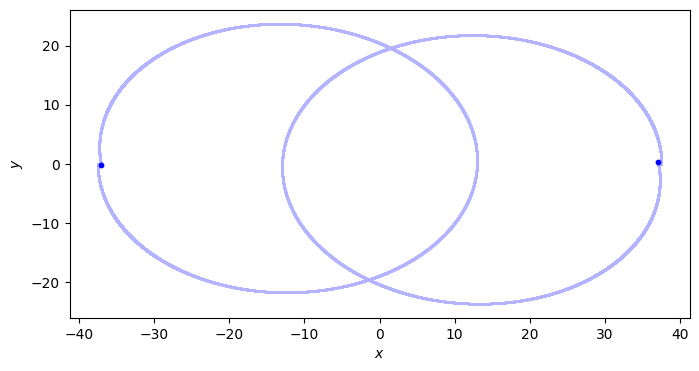

In [36]:
# Simulation parameters
phi = np.linspace(0, 2 * np.pi, 100)
N = 2  # Number of particles
t = 0  # current time of the simulation
tEnd = 0.81  # time at which simulation ends
dt = 0.0001  # timestep
softening = 0.2 * rmin  # softening length

# Generate Initial Conditions
np.random.seed(17)  # set the random number generator seed

mass = np.array([[m1], [m2]])
pos = np.array([[x1(0), y1(0), 0], [x2(0), y2(0), 0]])
vel = np.array([[vx1(0), vy1(0), 0], [vx2(0), vy2(0), 0]])

# Convert to Center-of-Mass frame
vel -= np.mean(mass * vel, 0) / np.mean(mass)

# calculate initial gravitational accelerations
acc = getAcc(pos, mass, G, softening)

# number of timesteps
Nt = int(np.ceil(tEnd / dt))

# save energies, particle orbits for plotting trails
pos_save = np.zeros((N, 3, Nt + 1))
pos_save[:, :, 0] = pos
t_all = np.arange(Nt + 1) * dt

# Simulation Main Loop
for i in range(Nt):
    # (1/2) kick
    vel += acc * dt / 2.0

    # drift
    pos += vel * dt

    # update accelerations
    acc = getAcc(pos, mass, G, softening)

    # (1/2) kick
    vel += acc * dt / 2.0

    # update time
    t += dt

    # save energies, positions for plotting trail
    pos_save[:, :, i + 1] = pos

xx = pos_save[:, 0, :]
yy = pos_save[:, 1, :]
plt.figure(figsize=(8, 4))
plt.scatter(xx, yy, s=1, color=[0.7, 0.7, 1])
plt.scatter(pos[:, 0], pos[:, 1], s=10, color="blue")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

# Particles 

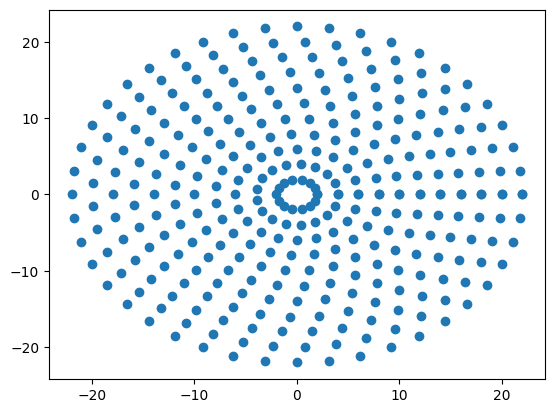

In [44]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

x = []
y = []
vx = []
vy = []
r = []

e = 0.2
G = 4*(np.pi**2)
M = 10e11


for i in range(1, 12):
    j = 12+3*i
    rad = (0.2+(i*0.5))*rmin
    angles = np.linspace(0,1,j)*(np.pi*2)
    x.extend(2*i*np.cos(angles))
    y.extend(2*i*np.sin(angles))
    r.extend(np.full(shape=j, fill_value=2.0*i))

r = np.array(r, float)
v0 = np.sqrt(G*M*rad/(rad**2+e**2))
vx.extend(v0*np.cos(angles))
vy.extend(v0*np.sin(angles))

plt.scatter(x,y)

Text(0, 0.5, '$y$')

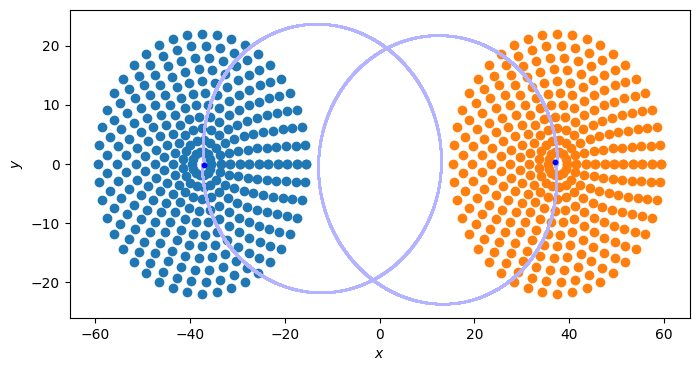

In [45]:
#Rename particle positions and update for each galaxy
a_px = np.subtract(x, xx[0, 0])
a_py = y

b_px = np.add(x, xx[0, 0])
b_py = y

plt.figure(figsize=(8, 4))
plt.scatter(a_px, a_py)
plt.scatter(b_px, b_py)
plt.scatter(xx, yy, s=1, color=[0.7, 0.7, 1])
plt.scatter(pos[:, 0], pos[:, 1], s=10, color="blue")
plt.xlabel("$x$")
plt.ylabel("$y$")


# Rotation

In [53]:
n1_a = np.cos(np.radians(-30))
n2_a = np.sin(np.radians(-30))

n1_b = np.cos(np.radians(-30))
n2_b = -(np.sin(np.radians(-30)))

c = np.cos(np.radians(-60))
s = np.sin(np.radians(-60))
a = 1 - c

def r_matrix(n1, n2):
    return np.array([[a*n1**2 + c, a*n1*n2, s*n2], 
                     [a*n1*n2, a*n2**2 + c, -s*n1 ],
                     [-s*n2, s*n1, c]])

rot_a = r_matrix(n1_a, n1_b)
rot_b = r_matrix(n1_b, n2_b)